In [3]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import autokeras as ak

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 7s 1us/step


In [7]:
def load_data(directory, width=28, height=28, color_mode='grayscale', train_size=0.8):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory, image_size=(width, height), color_mode=color_mode, batch_size=None)
    images, labels = zip(*dataset.as_numpy_iterator())
    images = np.array(images); labels = np.array(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size=train_size)
    if color_mode == 'grayscale':
        x_train_count, width, height, depth = x_train.shape
        x_train = x_train.reshape(x_train_count, width, height)
        x_test_count, width, height, depth = x_test.shape
        x_test = x_test.reshape(x_test_count, width, height)
    return (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = load_data('santa', width=28, height=28)

Found 614 files belonging to 2 classes.


In [8]:
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:10])

(491, 28, 28)
(491,)
[1 0 1 1 1 0 0 0 0 1]


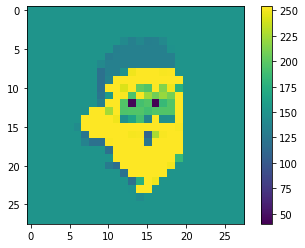

In [9]:
plt.figure()
plt.imshow(x_train[0].astype('uint8'))
plt.colorbar()
plt.grid(False)
plt.show()

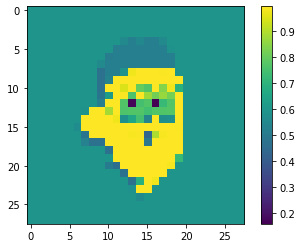

In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
clf = ak.ImageClassifier(max_trials=1)
clf.fit(x_train, y_train, epochs=2)
print(clf.evaluate(x_test, y_test))

INFO:tensorflow:Reloading Oracle from existing project .\image_classifier\oracle.json
INFO:tensorflow:Reloading Tuner from .\image_classifier\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2
16/16 [==============================] - 2s 60ms/step - loss: 0.6070 - accuracy: 0.6701
Epoch 2/2
16/16 [==============================] - 1s 56ms/step - loss: 0.4713 - accuracy: 0.7556
INFO:tensorflow:Assets written to: .\image_classifier\best_model\assets
4/4 [==============================] - 0s 14ms/step - loss: 0.4988 - accuracy: 0.7480
[0.49883535504341125, 0.7479674816131592]


In [12]:
y_pred = clf.predict(x_test)

4/4 [==============================] - 0s 20ms/step


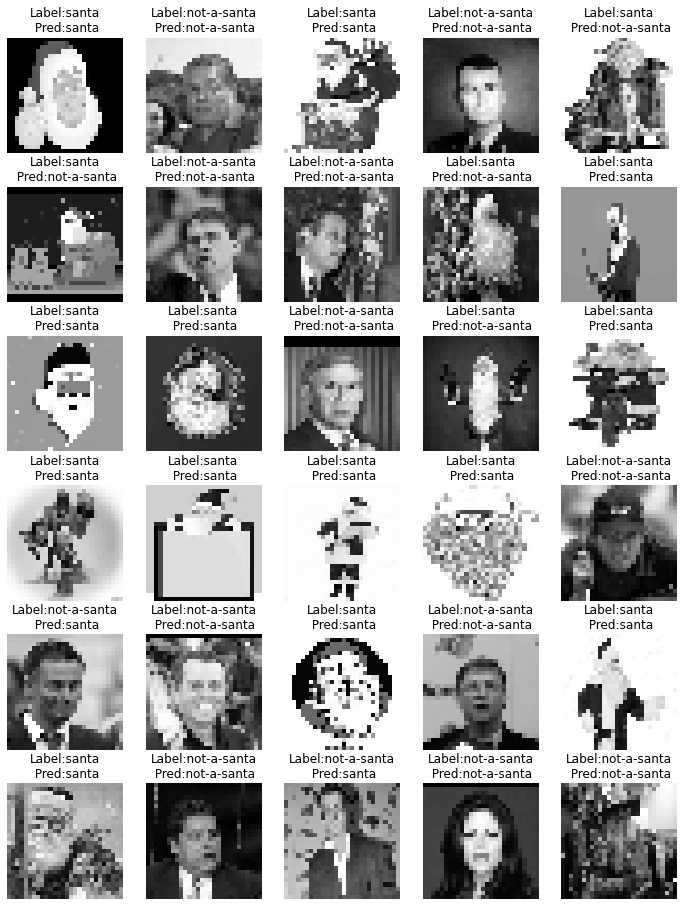

In [13]:
class_names = ['not-a-santa', 'santa']
plt.figure(figsize=(12,16))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(x_test[i], cmap='gray', interpolation='none')
    plt.title("Label:{}\n Pred:{}".format(
        class_names[y_test[i]], class_names[int(y_pred[i][0])]))
    plt.axis('off')